In [1]:
import pandas as pd


In [2]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [3]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


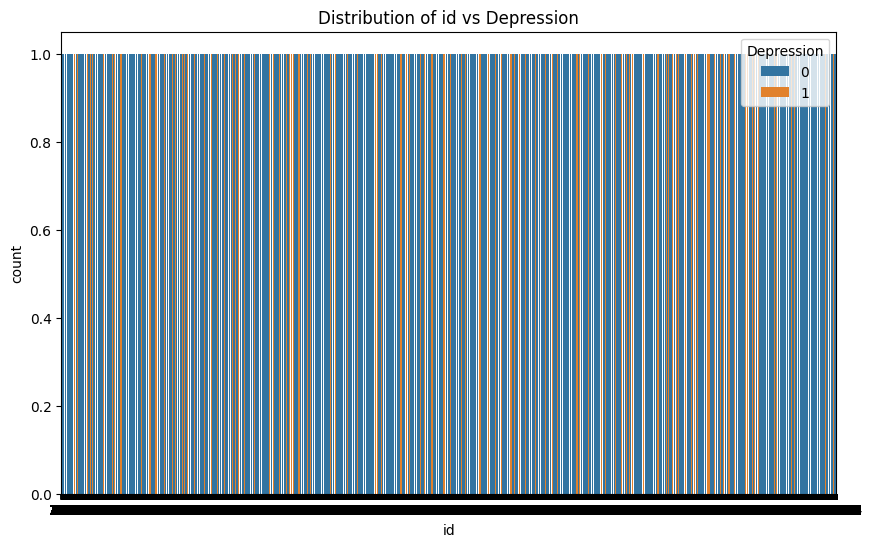

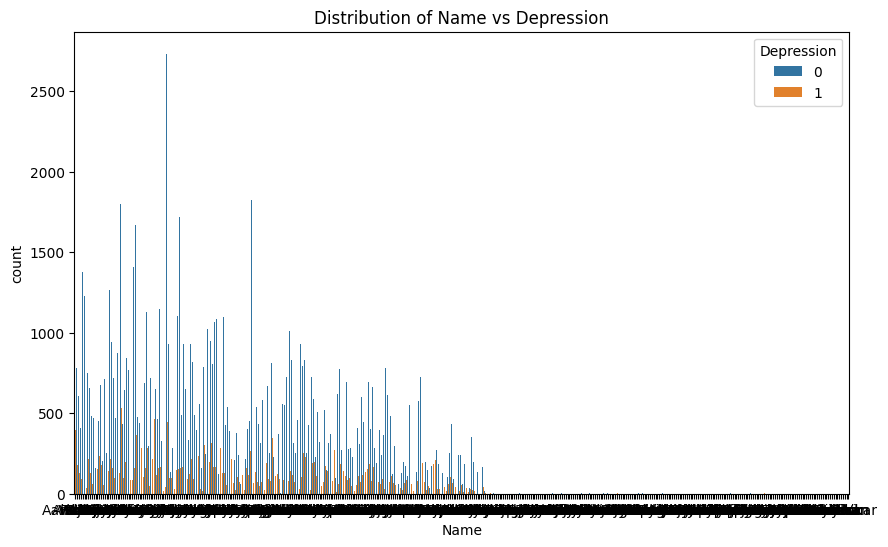

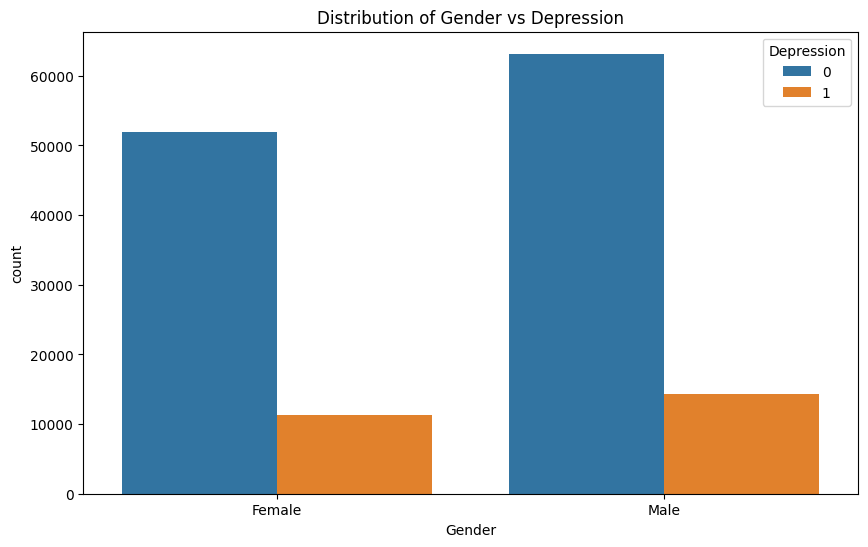

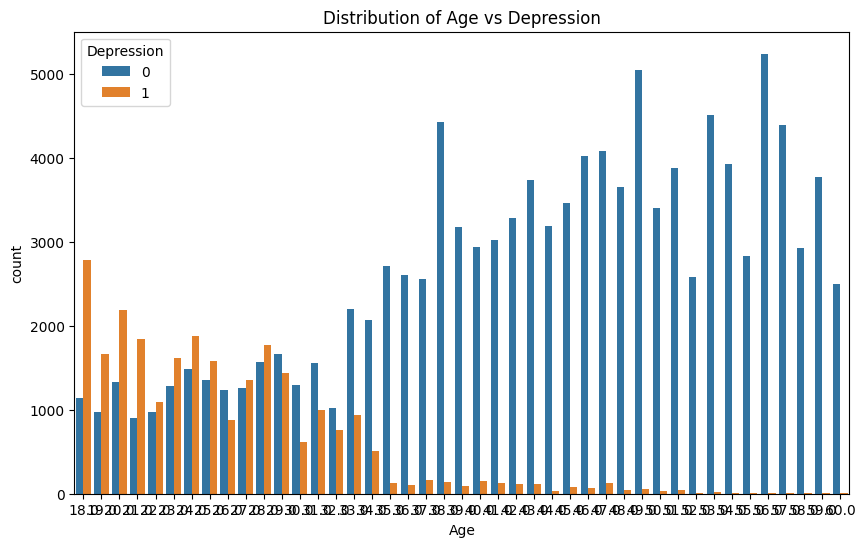

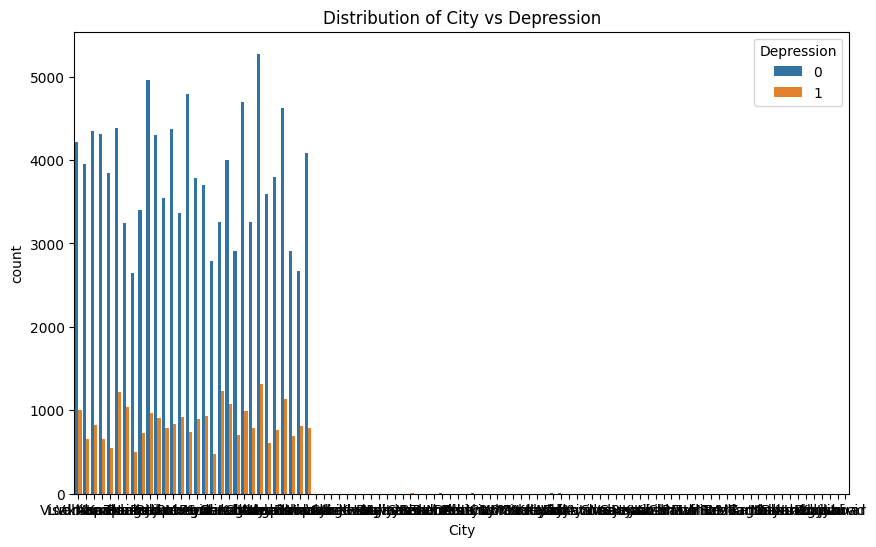

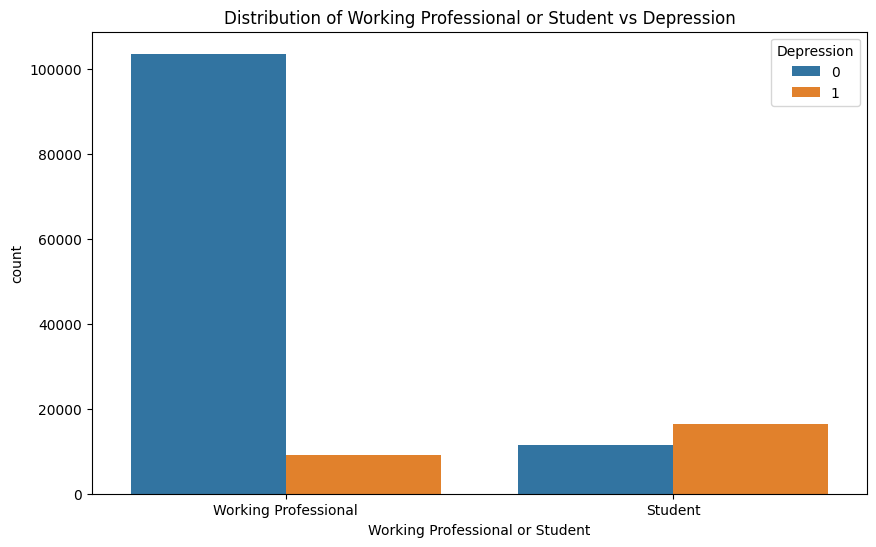

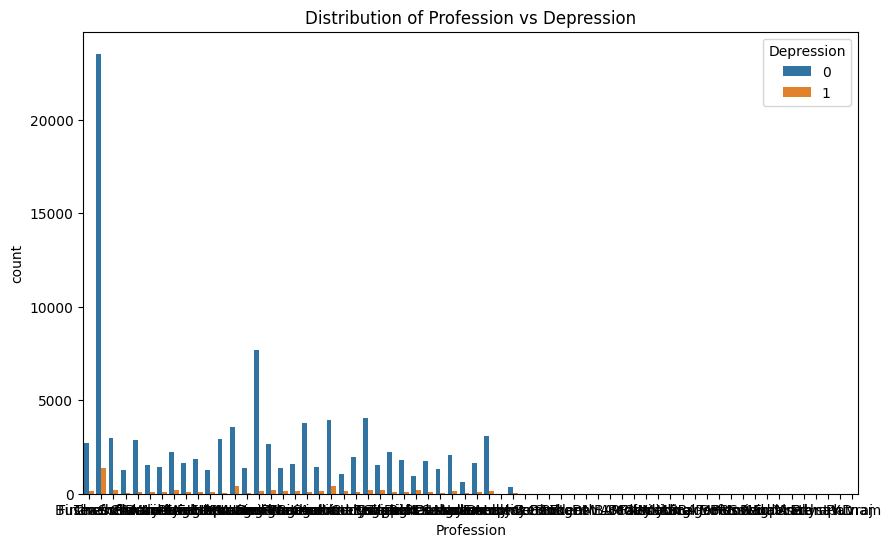

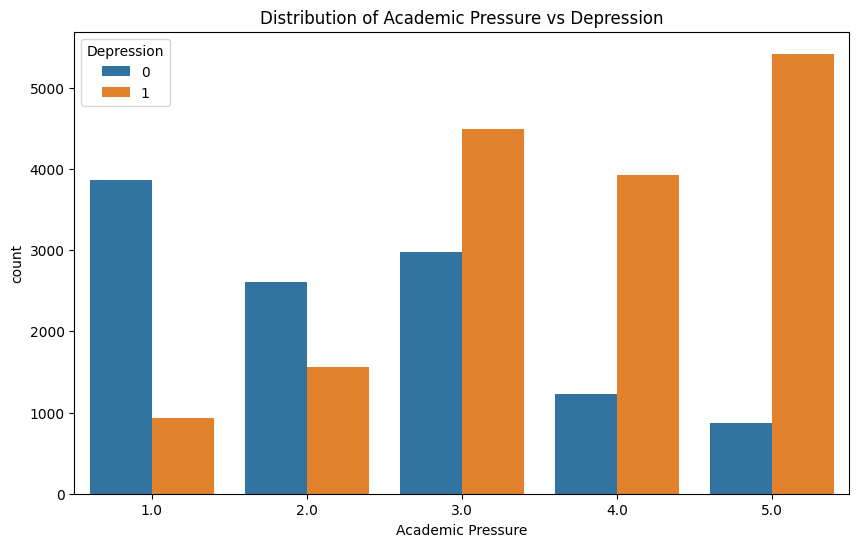

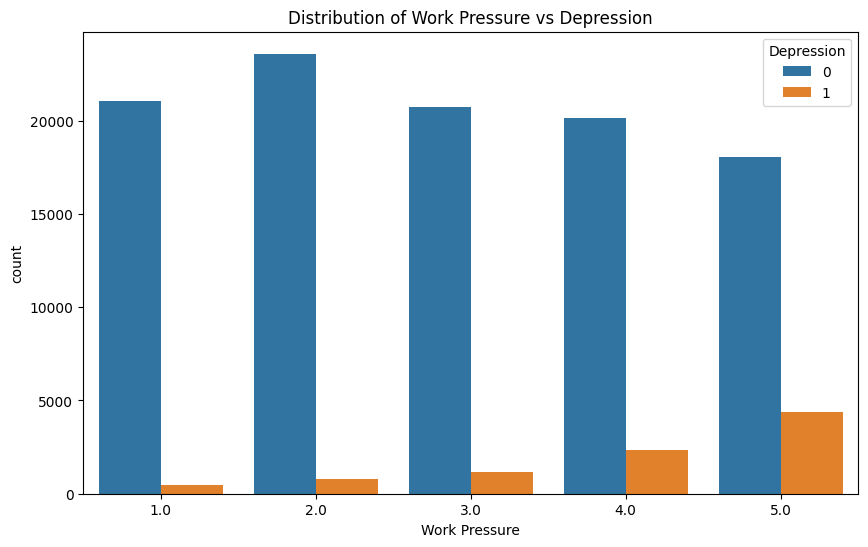

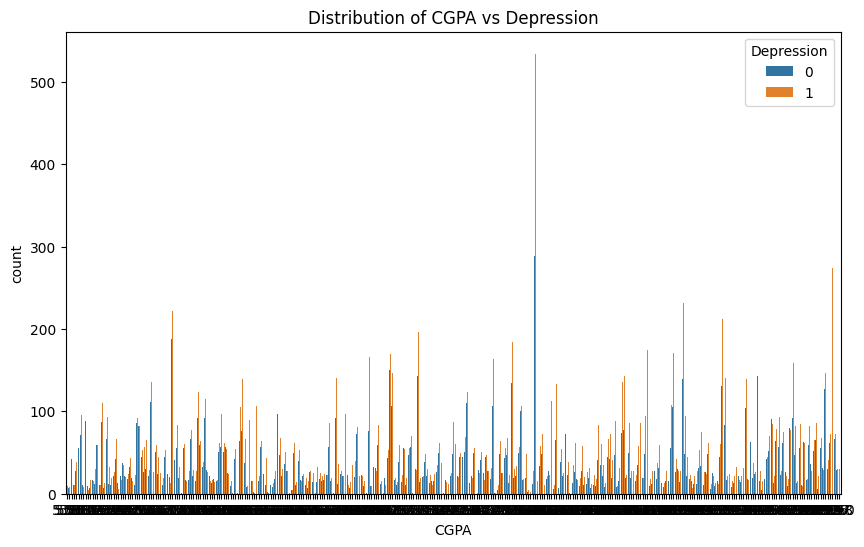

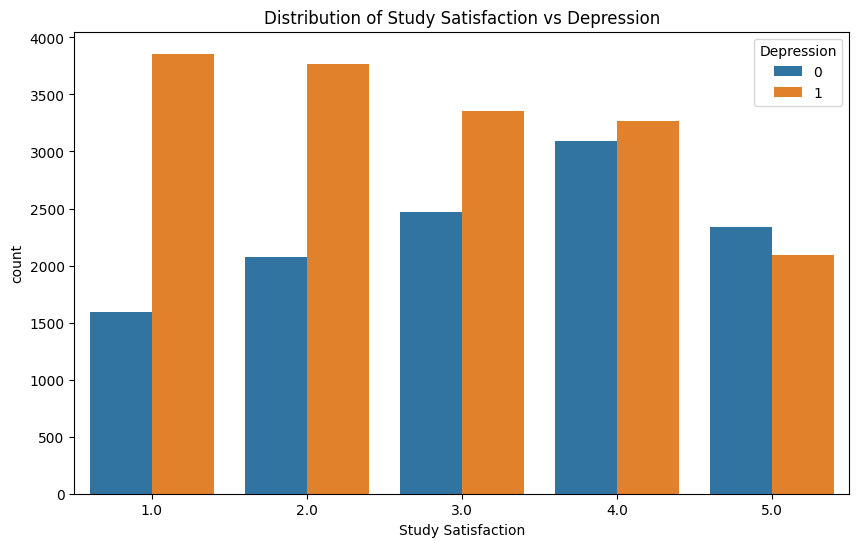

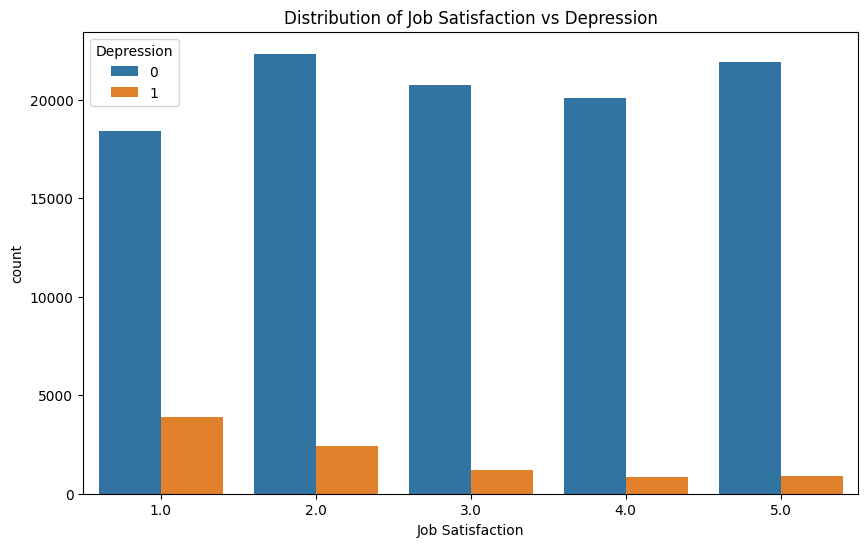

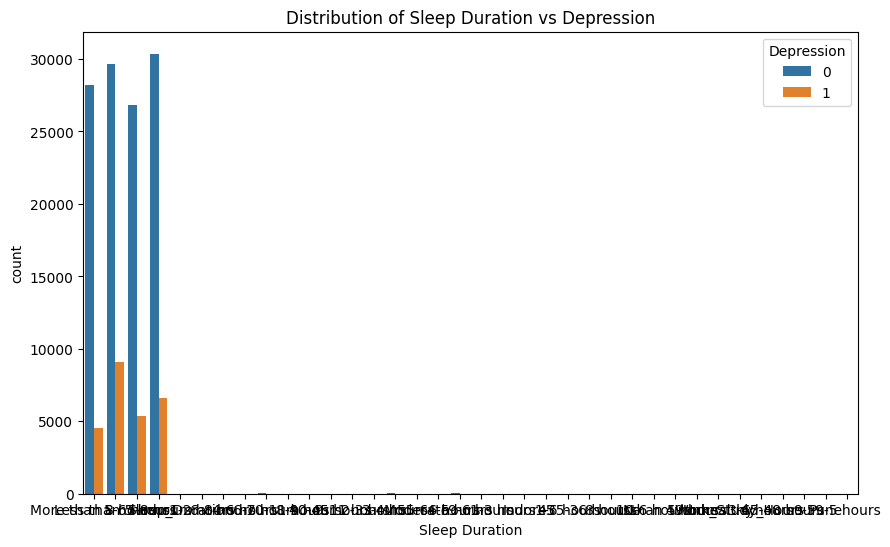

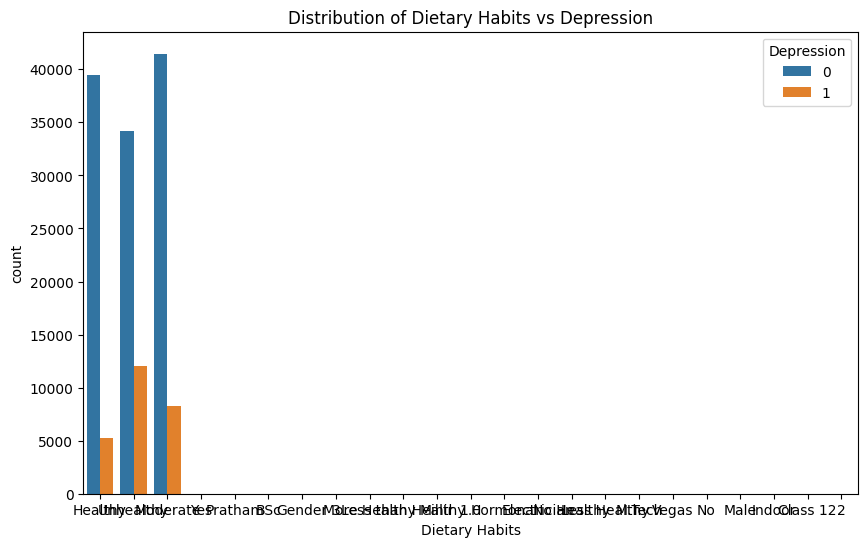

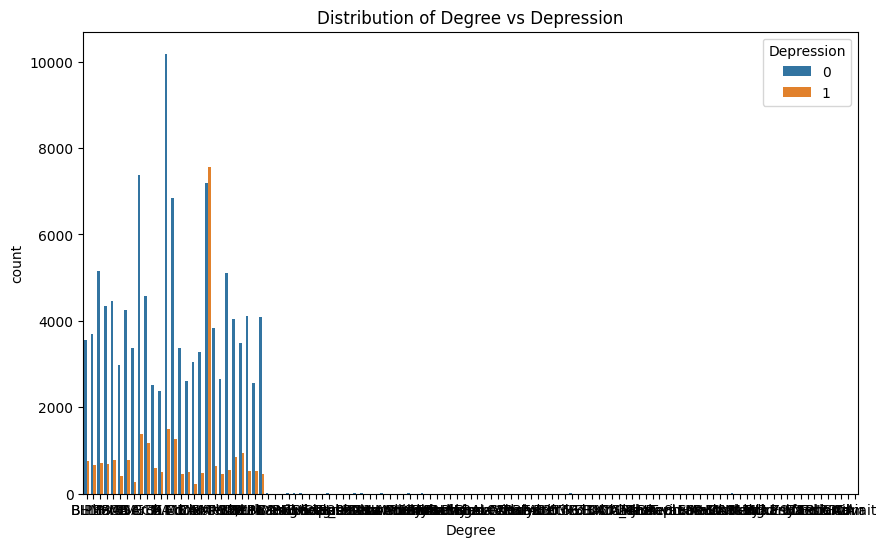

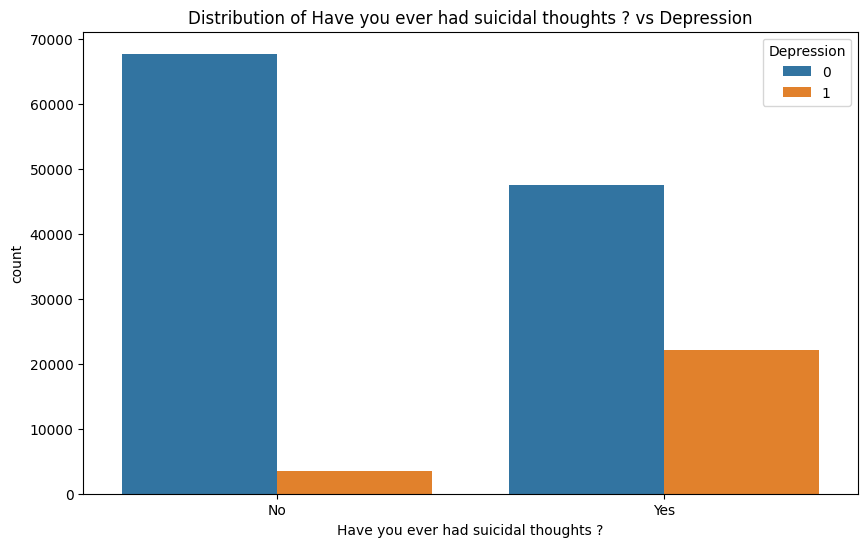

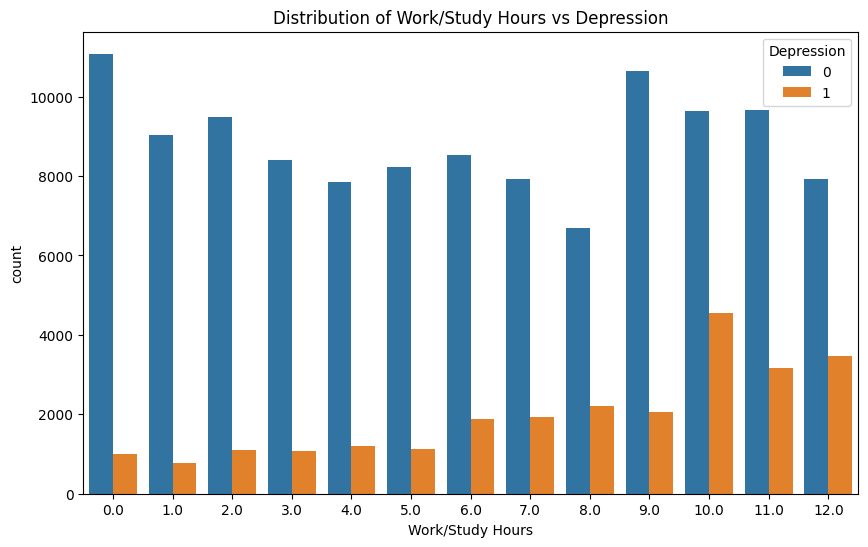

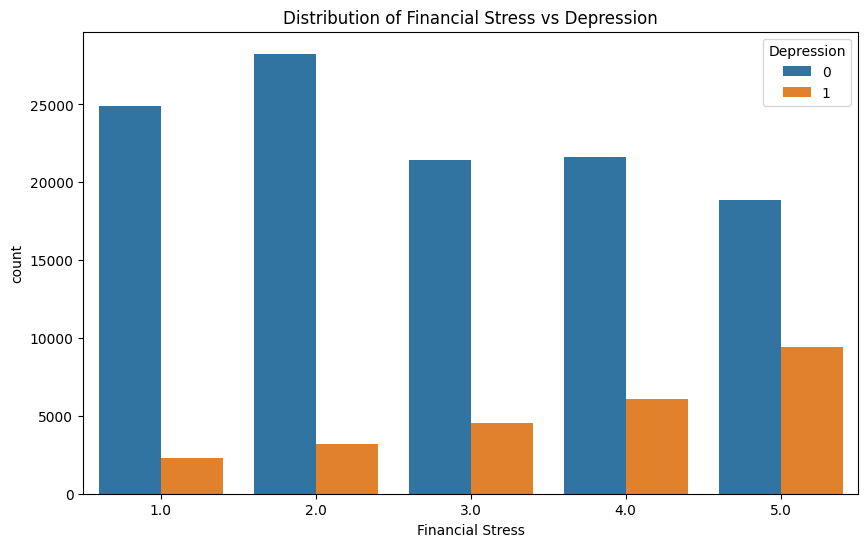

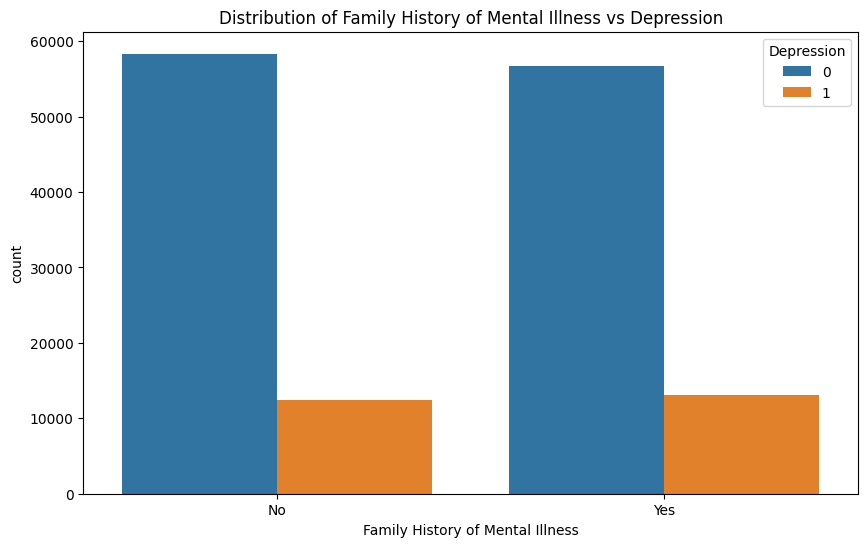

In [4]:


import matplotlib.pyplot as plt
import seaborn as sns


for col in train.columns:
  if col != 'Depression':
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Depression', data=train)
    plt.title(f'Distribution of {col} vs Depression')
    plt.show()

In [5]:
test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [6]:
train.shape

(140700, 20)

In [7]:
test.shape

(93800, 19)

In [8]:
train['Depression'].value_counts()

,count
Depression,
0,115133
1,25567


In [9]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = train[train.Depression == 0]
minority_class = train[train.Depression == 1]

# Oversample the minority class
minority_oversampled = resample(minority_class,
                                replace=True,  # Sample with replacement
                                n_samples=len(majority_class),  # Match the size of the majority class
                                random_state=42)  # For reproducibility

# Combine the majority class with the oversampled minority class
new = pd.concat([majority_class, minority_oversampled])

# Shuffle the dataset to mix the classes
new = new.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution
print(new['Depression'].value_counts())


Depression
0    115133
1    115133
Name: count, dtype: int64


In [10]:
# Check for missing values
print(new.isnull().sum())



id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                               105259
Academic Pressure                        145309
Work Pressure                             85013
CGPA                                     145308
Study Satisfaction                       145316
Job Satisfaction                          84982
Sleep Duration                                0
Dietary Habits                                9
Degree                                        4
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              5
Family History of Mental Illness              0
Depression                                    0
dtype: int64


In [11]:
# Columns to apply mean imputation to
columns_to_impute = ['Academic Pressure', 'Work Pressure', 'Financial Stress','Study Satisfaction','Job Satisfaction']

# Calculate the mean for each column (excluding NaN values)
means = new[columns_to_impute].mean()

# Fill NaN values in the specified columns with their respective means
for column in columns_to_impute:
    new[column] = new[column].fillna(means[column])

# Columns to apply mode imputation to
columns_to_impute_mode = ['Dietary Habits']

# Calculate the mode for each column
modes = new[columns_to_impute_mode].mode().iloc[0] # Get the first mode if multiple exist

# Fill NaN values in the specified columns with their respective modes
for column in columns_to_impute_mode:
    new[column] = new[column].fillna(modes[column])

                CGPA  Depression
CGPA        1.000000    0.021729
Depression  0.021729    1.000000


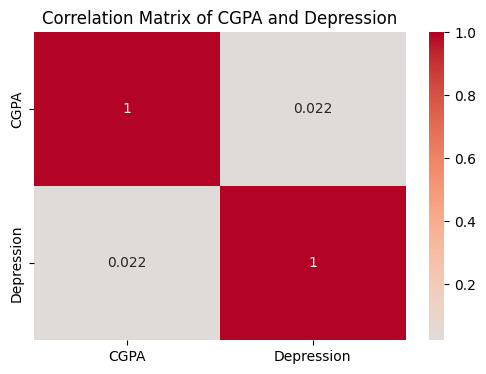

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = train[['CGPA', 'Depression']].corr()

# Display the correlation matrix
print(correlation_matrix)


plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of CGPA and Depression')
plt.show()

                City  Depression
City        1.000000   -0.020915
Depression -0.020915    1.000000


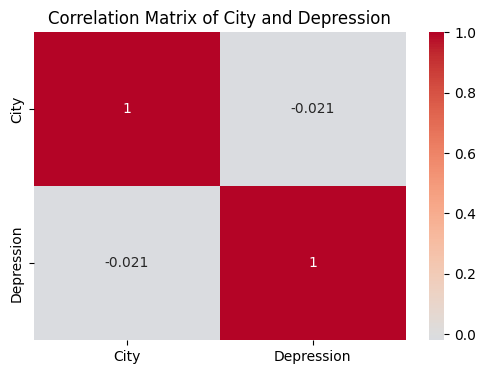

In [13]:


# Calculate the correlation matrix for 'City' and 'Depression'
# Convert 'City' to numerical representation if it's categorical
if not pd.api.types.is_numeric_dtype(train['City']):
    train['City'] = train['City'].astype('category').cat.codes

correlation_matrix = train[['City', 'Depression']].corr()

# Display the correlation matrix
print(correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of City and Depression')
plt.show()

            Profession  Depression
Profession    1.000000   -0.373064
Depression   -0.373064    1.000000


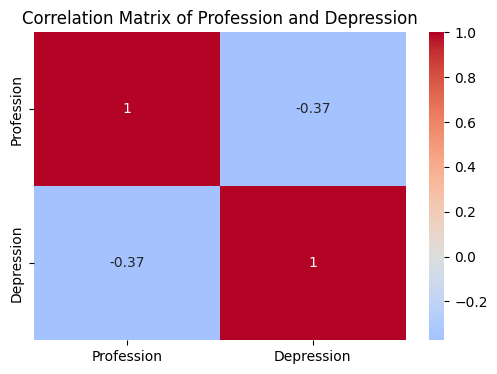

In [14]:


# Calculate the correlation matrix for 'Profession' and 'Depression'
# Convert 'Profession' to numerical representation if it's categorical
if not pd.api.types.is_numeric_dtype(train['Profession']):
    train['Profession'] = train['Profession'].astype('category').cat.codes

correlation_matrix = train[['Profession', 'Depression']].corr()

# Display the correlation matrix
print(correlation_matrix)


plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Profession and Depression')
plt.show()

              Degree  Depression
Degree      1.000000   -0.045565
Depression -0.045565    1.000000


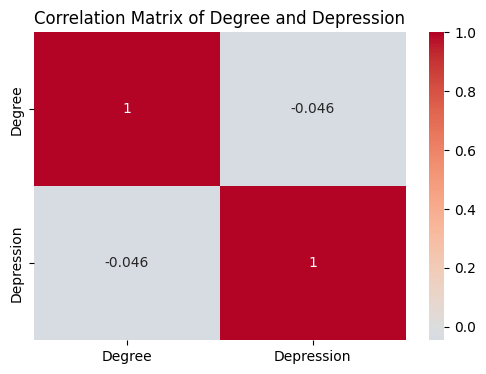

In [15]:


# Calculate the correlation matrix for 'Degree' and 'Depression'
# Convert 'Degree' to numerical representation if it's categorical
if not pd.api.types.is_numeric_dtype(train['Degree']):
    train['Degree'] = train['Degree'].astype('category').cat.codes

correlation_matrix = train[['Degree', 'Depression']].corr()

# Display the correlation matrix
print(correlation_matrix)


plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Degree and Depression')
plt.show()

                Name  Depression
Name        1.000000   -0.028897
Depression -0.028897    1.000000


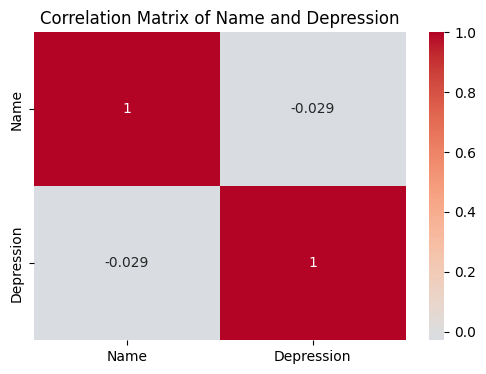

In [16]:


# Calculate the correlation matrix for 'Name' and 'Depression'
# Convert 'Name' to numerical representation if it's categorical.

if not pd.api.types.is_numeric_dtype(train['Name']):
    train['Name'] = train['Name'].astype('category').cat.codes

correlation_matrix = train[['Name', 'Depression']].corr()

# Display the correlation matrix
print(correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Name and Depression')
plt.show()

              Gender  Depression
Gender      1.000000    0.008144
Depression  0.008144    1.000000


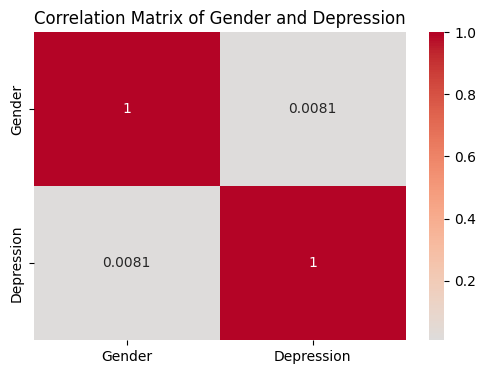

In [17]:

# Calculate the correlation matrix for 'Gender' and 'Depression'
# Convert 'Gender' to numerical representation if it's categorical
if not pd.api.types.is_numeric_dtype(train['Gender']):
    train['Gender'] = train['Gender'].astype('category').cat.codes

correlation_matrix = train[['Gender', 'Depression']].corr()

# Display the correlation matrix
print(correlation_matrix)


plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Gender and Depression')
plt.show()

In [18]:
new = new.drop(['Profession', 'Name', 'CGPA', 'Degree','City','Gender'],axis=1)

In [19]:
new.dtypes


,0
id,int64
Age,float64
Working Professional or Student,object
Academic Pressure,float64
Work Pressure,float64
Study Satisfaction,float64
Job Satisfaction,float64
Sleep Duration,object
Dietary Habits,object
Have you ever had suicidal thoughts ?,object


In [20]:

# Dietary Habits	object
# Have you ever had suicidal thoughts ?	object  Family History of Mental Illness	object convert categorical into numerical

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# List of categorical columns to convert
categorical_cols = ['Working Professional or Student', 'Sleep Duration', 'Dietary Habits',
                    'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

# Convert categorical columns to numerical using Label Encoding
for col in categorical_cols:
    if col in new.columns:
        new[col] = new[col].astype('category').cat.codes


# Display the data types to confirm the changes
new.dtypes

,0
id,int64
Age,float64
Working Professional or Student,int8
Academic Pressure,float64
Work Pressure,float64
Study Satisfaction,float64
Job Satisfaction,float64
Sleep Duration,int8
Dietary Habits,int8
Have you ever had suicidal thoughts ?,int8


                                             id       Age  \
id                                     1.000000 -0.002988   
Age                                   -0.002988  1.000000   
Working Professional or Student       -0.002077  0.564602   
Academic Pressure                      0.005821 -0.007038   
Work Pressure                          0.003137 -0.184187   
Study Satisfaction                     0.002194 -0.007155   
Job Satisfaction                       0.001415  0.109782   
Sleep Duration                        -0.003208 -0.025653   
Dietary Habits                        -0.001021 -0.124913   
Have you ever had suicidal thoughts ?  0.004779 -0.297294   
Work/Study Hours                       0.005419 -0.184391   
Financial Stress                       0.004444 -0.179901   
Family History of Mental Illness      -0.004799 -0.001437   
Depression                             0.008696 -0.710661   

                                       Working Professional or Student  \
id        

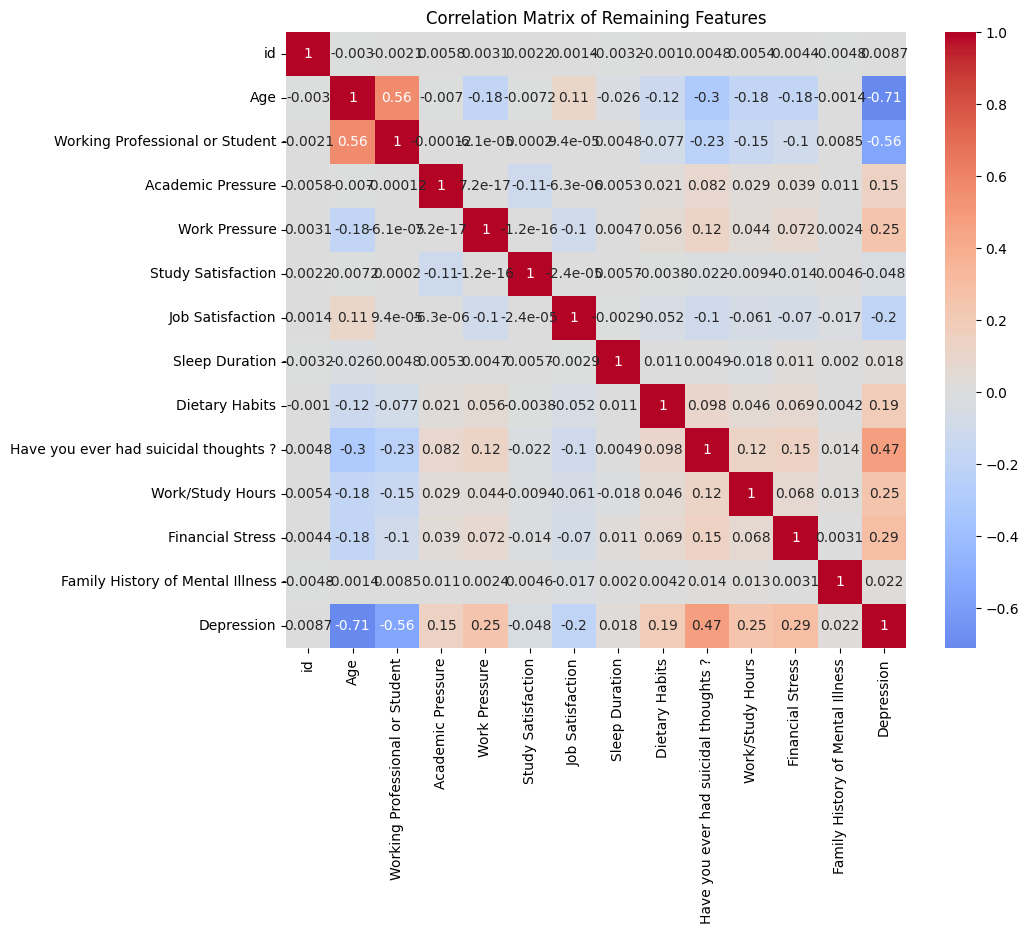

In [21]:

# Calculate the correlation matrix for the remaining columns in 'new'
correlation_matrix = new.corr()

# Display the correlation matrix
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Remaining Features')
plt.show()

In [22]:


new = new.drop(['Academic Pressure','id','Study Satisfaction','Job Satisfaction','Sleep Duration','Family History of Mental Illness'], axis=1)

In [23]:
print(new.isnull().sum())

Age                                      0
Working Professional or Student          0
Work Pressure                            0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Depression                               0
dtype: int64


In [24]:


import pandas as pd



for col in new.columns:
  print(f"Unique values for column '{col}':")
  print(new[col].unique())
  print("-" * 20)

Unique values for column 'Age':
[56. 32. 18. 54. 21. 50. 29. 25. 52. 39. 43. 33. 37. 26. 20. 51. 53. 58.
 27. 46. 49. 31. 35. 34. 57. 23. 28. 48. 47. 60. 22. 30. 44. 24. 36. 41.
 38. 55. 19. 59. 45. 42. 40.]
--------------------
Unique values for column 'Working Professional or Student':
[1 0]
--------------------
Unique values for column 'Work Pressure':
[2.         3.22553751 5.         4.         3.         1.        ]
--------------------
Unique values for column 'Dietary Habits':
[15 20  7  9 18  8 16  5 22  6 12 21 17 14  2  4  3 13  0  1 10 11 19]
--------------------
Unique values for column 'Have you ever had suicidal thoughts ?':
[1 0]
--------------------
Unique values for column 'Work/Study Hours':
[ 2.  6.  9.  0.  8. 11. 10.  3.  4.  7.  5. 12.  1.]
--------------------
Unique values for column 'Financial Stress':
[4.         5.         2.         3.         1.         3.25307369]
--------------------
Unique values for column 'Depression':
[0 1]
--------------------


In [25]:


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Separate features (X) and target variable (y)
X = new.drop('Depression', axis=1)
y = new['Depression']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")

Accuracy of the Logistic Regression model: 0.9056976592695531


In [26]:


from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model's accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy of the Random Forest model: {rf_accuracy}")

Accuracy of the Random Forest model: 0.9443696530160247


In [27]:

# XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"Accuracy of the XGBoost model: {xgb_accuracy}")

# SVM
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Accuracy of the SVM model: {svm_accuracy}")

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f"Accuracy of the Naive Bayes model: {nb_accuracy}")

Accuracy of the XGBoost model: 0.9139705563034698
Accuracy of the SVM model: 0.907174186824163
Accuracy of the Naive Bayes model: 0.8835280323098971


In [28]:

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score


# Assuming X_scaled and y are defined as in your previous code
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid') # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1) # Adjust epochs and batch_size as needed

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy of the Neural Network model: {accuracy}")


# Predict on the test data
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32") # Convert probabilities to binary predictions

# Calculate the accuracy
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy of the Neural Network model (using sklearn accuracy_score): {nn_accuracy}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5181/5181 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9010 - loss: 0.2529 - val_accuracy: 0.9012 - val_loss: 0.2458
Epoch 2/10
5181/5181 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9074 - loss: 0.2340 - val_accuracy: 0.9043 - val_loss: 0.2422
Epoch 3/10
5181/5181 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9079 - loss: 0.2343 - val_accuracy: 0.9028 - val_loss: 0.2425
Epoch 4/10
5181/5181 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9076 - loss: 0.2353 - val_accuracy: 0.9035 - val_loss: 0.2417
Epoch 5/10
5181/5181 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9069 - loss: 0.2350 - val_accuracy: 0.9039 - val_loss: 0.2446
Epoch 6/10
5181/5181 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9062 - loss: 0.2356 - val_accuracy: 0.9044 - val_loss: 0.2405
Epoch 7/10
5181/5181 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9089 - loss: 0.2313 - val_accuracy: 0.9040 - val_loss: 0.2406
Epoch 8/10
5181/5181 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9082 - loss: 0.2340 - val_a

In [29]:
test.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,24632
Academic Pressure,75033
Work Pressure,18778
CGPA,75034


In [30]:
columns_to_impute = ['Academic Pressure', 'Work Pressure', 'Financial Stress','Study Satisfaction','Job Satisfaction']
# Calculate the mean for each column (excluding NaN values)
means = test[columns_to_impute].mean()

# Fill NaN values in the specified columns with their respective means
for column in columns_to_impute:
    test[column] = test[column].fillna(means[column])

# Columns to apply mode imputation to
columns_to_impute_mode = ['Dietary Habits','Profession',]

# Calculate the mode for each column
modes = test[columns_to_impute_mode].mode().iloc[0] # Get the first mode if multiple exist

# Fill NaN values in the specified columns with their respective modes
for column in columns_to_impute_mode:
    test[column] = test[column].fillna(modes[column])

In [31]:
test = test.drop(['Academic Pressure','Study Satisfaction','Job Satisfaction','Sleep Duration','Family History of Mental Illness'], axis=1)

In [32]:
test = test.drop(['Profession', 'Name', 'CGPA', 'Degree','City','Gender'],axis=1)

In [33]:
test.isnull().sum()

,0
id,0
Age,0
Working Professional or Student,0
Work Pressure,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Work/Study Hours,0
Financial Stress,0


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# List of categorical columns to convert
categorical_cols = ['Working Professional or Student', 'Sleep Duration', 'Dietary Habits',
                    'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

# Convert categorical columns to numerical using Label Encoding
for col in categorical_cols:
    if col in test.columns:  # Check if the column exists in the DataFrame
        test[col] = test[col].astype('category').cat.codes


# Display the data types to confirm the changes
test.dtypes

,0
id,int64
Age,float64
Working Professional or Student,int8
Work Pressure,float64
Dietary Habits,int8
Have you ever had suicidal thoughts ?,int8
Work/Study Hours,float64
Financial Stress,float64


In [35]:
import pandas as pd



for col in test.columns:
  print(f"Unique values for column '{col}':")
  print(test[col].unique())
  print("-" * 20)

Unique values for column 'id':
[140700 140701 140702 ... 234497 234498 234499]
--------------------
Unique values for column 'Age':
[53.   58.   23.   47.   29.   28.   21.   45.   44.   48.   18.   52.
 34.   49.   26.   32.   41.   42.   25.   43.   20.   33.   19.   51.
 46.   59.   39.   50.   55.   54.   38.   35.   57.   56.   37.   36.
 40.   22.   30.   31.   60.   24.   27.   32.08]
--------------------
Unique values for column 'Working Professional or Student':
[1 0]
--------------------
Unique values for column 'Work Pressure':
[2.         4.         3.01179654 5.         1.         3.        ]
--------------------
Unique values for column 'Dietary Habits':
[12  5 20 13 15  6 16 10  8 11 18  9  1  3  4 19  2 21 17  0 14  7]
--------------------
Unique values for column 'Have you ever had suicidal thoughts ?':
[0 1]
--------------------
Unique values for column 'Work/Study Hours':
[ 9.  6. 12. 10.  3.  0.  8.  5.  4. 11.  7.  1.  2.]
--------------------
Unique values for col

In [36]:


test_scaled = scaler.transform(test.drop('id', axis=1))

test_pred = rf_model.predict(test_scaled)

In [37]:

# Create submission DataFrame
submission = pd.DataFrame({'id': test['id'], 'Depression': test_pred})

# Save the submission file
submission.to_csv('submission.csv', index=False)

In [38]:

# Comparing y_pred and test_pred for the first 100 rows
comparison_df = pd.DataFrame({'y_pred': y_pred[:100], 'test_pred': test_pred[:100]})
comparison_df

,y_pred,test_pred
0,1,0
1,1,0
2,0,0
3,0,1
4,1,0
...,...,...
95,1,0
96,1,0
97,1,1
98,1,1


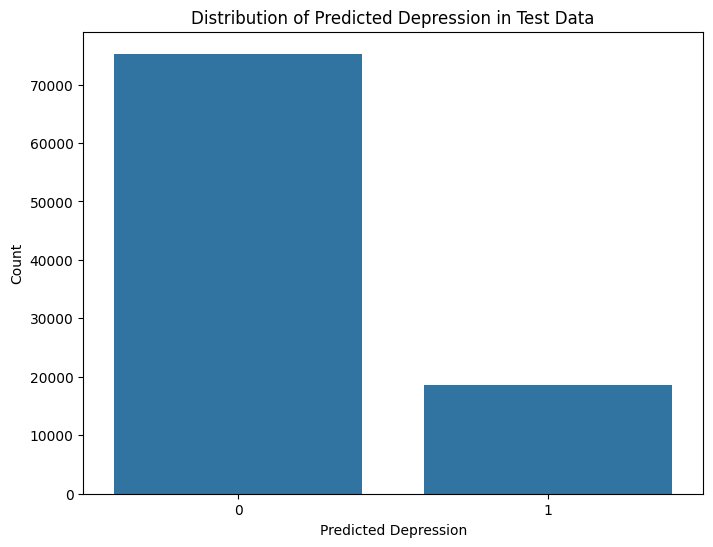

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 6))
sns.countplot(x=test_pred)
plt.title('Distribution of Predicted Depression in Test Data')
plt.xlabel('Predicted Depression')
plt.ylabel('Count')
plt.show()

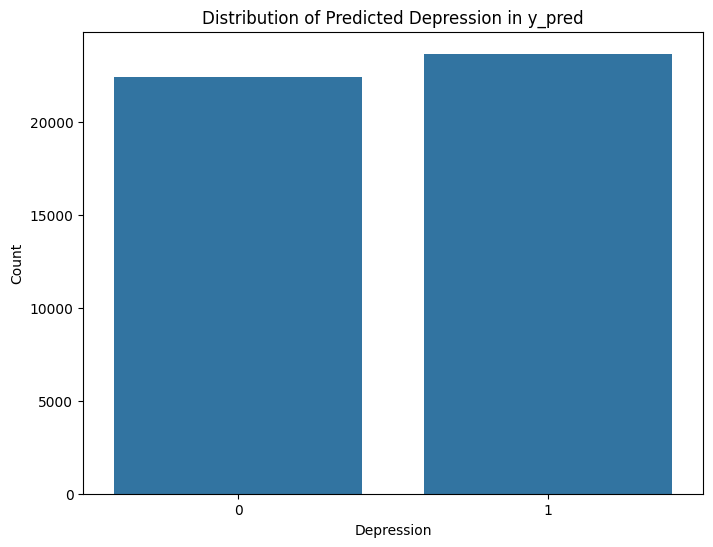

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred)
plt.title('Distribution of Predicted Depression in y_pred')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()

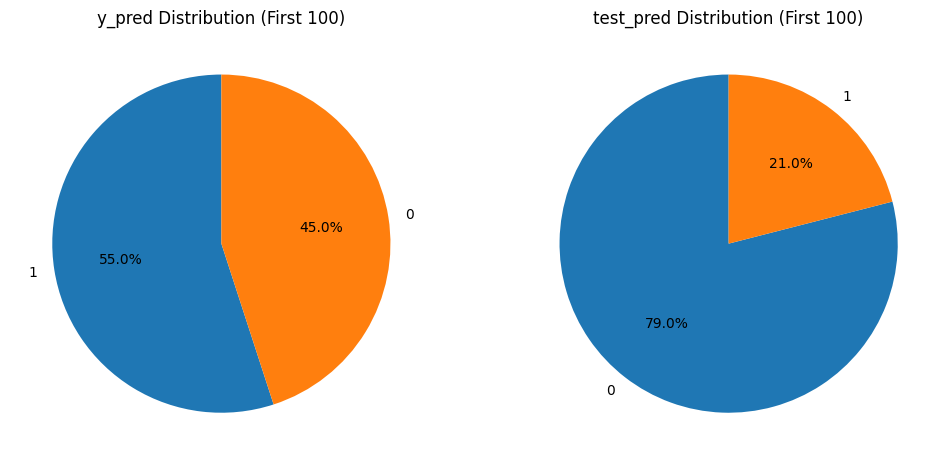

In [41]:
# comparing  how close y_pred and test_pred plot pie chart

import matplotlib.pyplot as plt

# Count the occurrences of each prediction value
y_pred_counts = pd.Series(y_pred[:100]).value_counts()
test_pred_counts = pd.Series(test_pred[:100]).value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for y_pred
axes[0].pie(y_pred_counts, labels=y_pred_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('y_pred Distribution (First 100)')

# Pie chart for test_pred
axes[1].pie(test_pred_counts, labels=test_pred_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('test_pred Distribution (First 100)')

plt.show()

In [42]:

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")



Precision: 0.8957576269754077
Recall: 0.9186998916576381
F1-score: 0.9070837166513339
